**In this EDA project we are going to analyse the Video Games Sales data, available in this Kaggle platform.This project explores global video game sales data to reveal key trends in genres, platforms, and publishers.
Perfect visulizations will make this dataset more interactive and easy to understand.Let’s dive into the data-driven world of gaming.**

At first we are going to import the libraries which will help us ìn analysis and doing visualisations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Then we will read the dataset

In [2]:
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv')

In [3]:
df.head() #Head 5 data of the dataset

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.dtypes #This function helps us to identify which type columns we have e.g. int, object, float or bulean

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
df.shape  #Shows the count of rows and columns

(16598, 11)

In [6]:
df.isnull().sum()  #These functions indentify if there are null values in the columns

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df['Year'] #fetching the years

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16593    2002.0
16594    2003.0
16595    2008.0
16596    2010.0
16597    2003.0
Name: Year, Length: 16598, dtype: float64

Converting the Year column into datetime format.

In [8]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])                    
df['Year'] = df['Year'].astype(int)

df['Year_datetime'] = pd.to_datetime(df['Year'], format='%Y')

Filling the null values of the Publisher column with 'Unknown'.

In [9]:
df['Publisher'] = df['Publisher'].fillna('Unknown')

Rechecking.If all the columns are showing 0, then null values are cleaned.

In [10]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
Year_datetime    0
dtype: int64

In [11]:
# a quick statistical summary of numerical columns
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Year_datetime
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232,2006-05-29 07:49:49.673546752
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,1980-01-01 00:00:00
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,2003-01-01 00:00:00
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,2007-01-01 00:00:00
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000,2010-01-01 00:00:00
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000,2020-01-01 00:00:00
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732,NaN


**All the required data cleanings are done.Now it's time for the visualisation**

**Note: Using Matlpotlib library to visualise it. This library is very powerful and widely used python library for data visualisation.**

**What is the genre wise total games sold?**

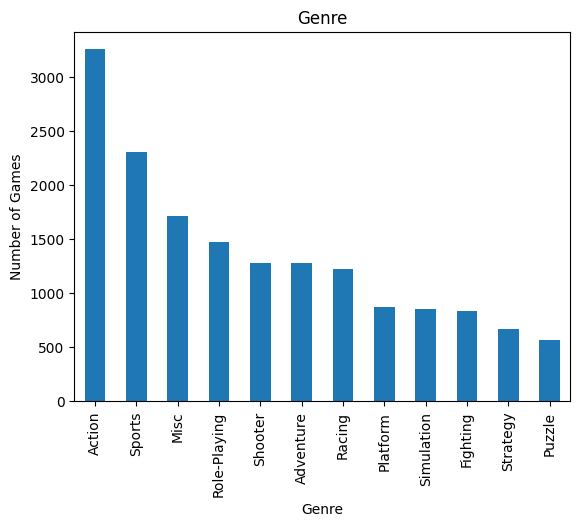

In [12]:
df['Genre'].value_counts().plot(kind='bar', title='Genre')
plt.ylabel('Number of Games')
plt.show() 

**Which genre has sold most globally?**

In [13]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

top_genre = genre_sales.idxmax()
top_genre_sales = genre_sales.max()

print(f"The most globally sold genre is '{top_genre}' with {top_genre_sales:.2f} million units sold.")

The most globally sold genre is 'Action' with 1722.88 million units sold.


**What are the top 5 platforms by global sales?**

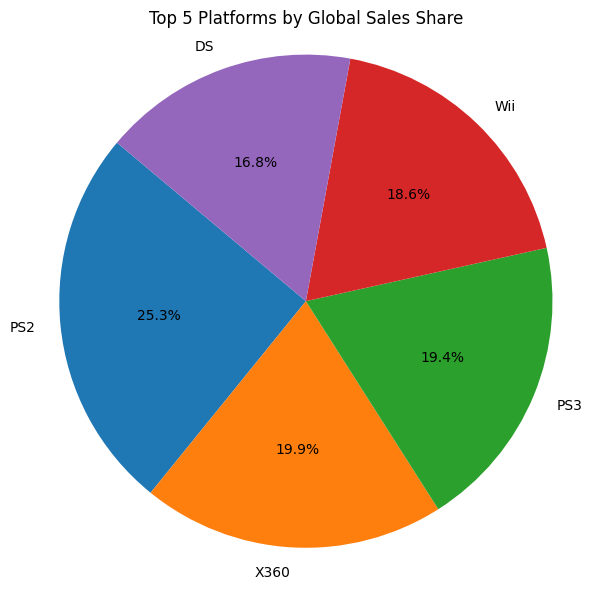

In [14]:
top_5_platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(7, 7))
plt.pie(top_5_platforms, labels=top_5_platforms.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Platforms by Global Sales Share')
plt.axis('equal')
plt.show()

**What is the region wise total sales?**

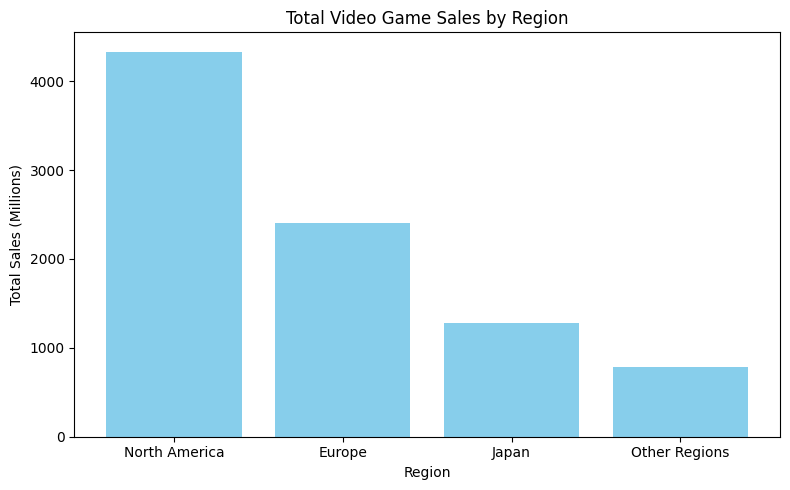

In [15]:
region_sales = {
    'North America': df['NA_Sales'].sum(),
    'Europe': df['EU_Sales'].sum(),
    'Japan': df['JP_Sales'].sum(),
    'Other Regions': df['Other_Sales'].sum()
}
region_df = pd.DataFrame(list(region_sales.items()), columns=['Region', 'Sales'])
plt.figure(figsize=(8, 5))
plt.bar(region_df['Region'], region_df['Sales'], color = 'skyblue')
plt.title('Total Video Game Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (Millions)')
plt.tight_layout()
plt.show()

**How have global sales changed over the years?**

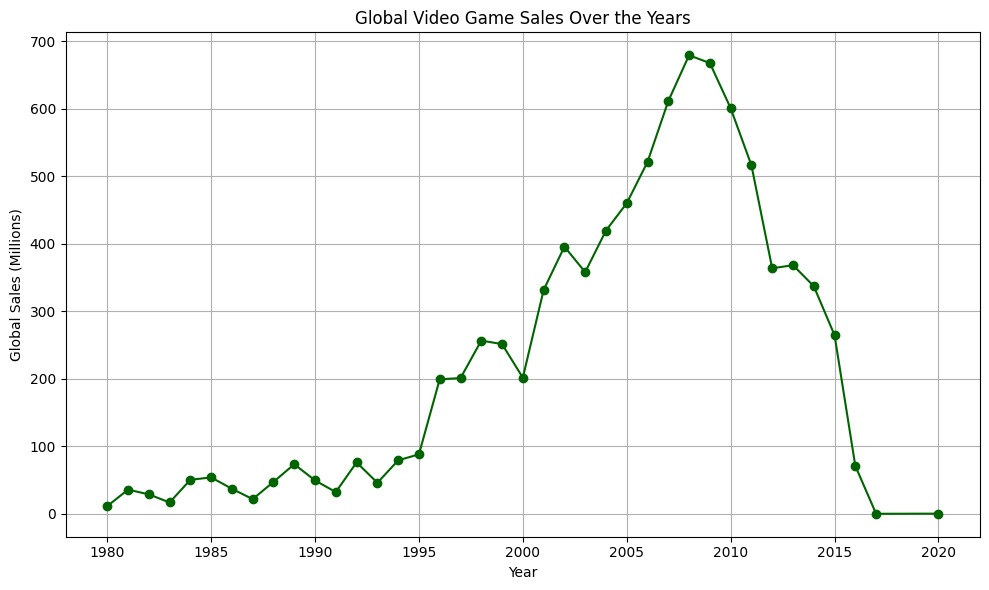

In [16]:
yearly_sales = df.groupby('Year_datetime')['Global_Sales'].sum().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', linestyle='-', color='darkgreen')
plt.title('Global Video Game Sales Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales (Millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Which publishers have the highest global sales?**

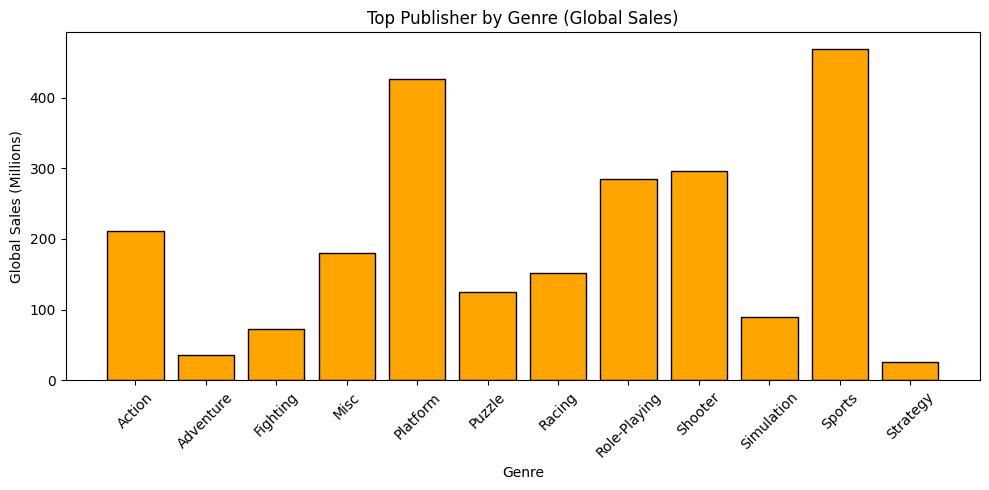

In [17]:
genre_publisher = df.groupby(['Genre', 'Publisher'])['Global_Sales'].sum().reset_index()
top_genre_publishers = genre_publisher.sort_values(['Genre', 'Global_Sales'], ascending=[True, False]).drop_duplicates('Genre')

plt.figure(figsize=(10, 5))
plt.bar(top_genre_publishers['Genre'], top_genre_publishers['Global_Sales'], color='orange', edgecolor='black')

plt.title('Top Publisher by Genre (Global Sales)')
plt.xlabel('Genre')
plt.ylabel('Global Sales (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**What are the most popular genres on each platform?**

In [18]:
platform_genre_sales = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()

most_popular_genres = platform_genre_sales.sort_values(['Platform', 'Global_Sales'], ascending=[True, False]).drop_duplicates('Platform')

print("Most Popular Genre on Each Platform (by Global Sales):")
print(most_popular_genres)

Most Popular Genre on Each Platform (by Global Sales):
    Platform         Genre  Global_Sales
0       2600        Action         26.39
10       3DO     Adventure          0.06
20       3DS  Role-Playing         75.71
33        DC        Sports          3.66
37        DS          Misc        137.67
52        GB  Role-Playing         88.24
61       GBA      Platform         78.08
69        GC        Action         37.25
85       GEN      Platform         15.45
91        GG      Platform          0.04
98       N64        Racing         40.09
108      NES      Platform         95.78
114       NG      Fighting          1.42
125       PC    Simulation         51.91
128     PCFX  Role-Playing          0.03
129       PS        Action        125.74
141      PS2        Action        272.43
153      PS3        Action        304.02
165      PS4        Action         87.06
177      PSP        Action         62.66
189      PSV        Action         20.01
203      SAT      Fighting          8.52
21

**What are the top 10 games by global sales?**

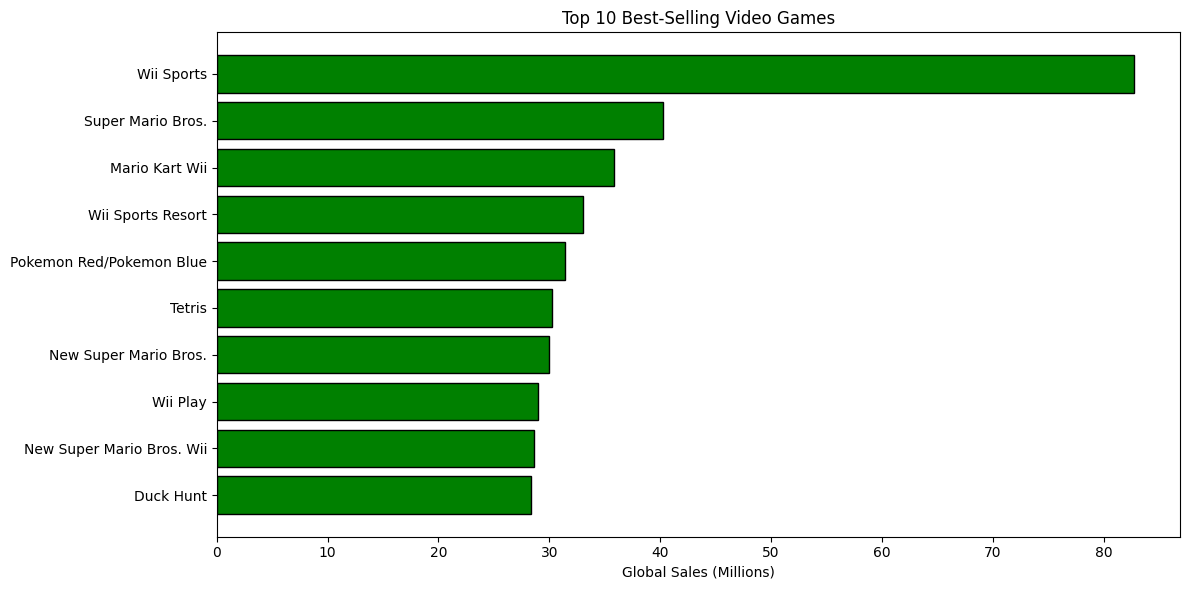

In [19]:
top_10_games = df.sort_values(by='Global_Sales', ascending = False).head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_10_games['Name'], top_10_games['Global_Sales'], color='green', edgecolor='black')
plt.xlabel('Global Sales (Millions)')
plt.title('Top 10 Best-Selling Video Games')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

**CONCLUSION**

Through this exploratory data analysis of video game sales, we uncovered valuable insights into the dynamics of the gaming industry. We observed that certain genres like Action and Sports consistently lead in sales, while platforms such as the Wii and PlayStation series dominate global reach.Region-wise analysis revealed that North America has the highest sales globally, followed by Europe, Japan and Other Region. Through the Year-wise sales trends, we got to know that, industry growth peaks and declines, influenced by technological shifts and platform lifecycles. Overall, this analysis not only enhances our understanding of historical sales patterns but also provides a solid foundation for forecasting trends, guiding marketing strategies, and identifying target markets within the gaming ecosystem.